In [25]:
from keras import models
from keras import layers
from keras.datasets import imdb

Load data

In [26]:
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words= 10000)

showing data
Decode the review

In [27]:
# print(train_data[0])
# print(train_labels[0])
# word_index = imdb.get_word_index()
# r_word_index = dict((v, k ) for k,v in word_index.items())
# decode_review = ''.join([r_word_index[word] + ' ' for word in train_data[0]])
# print(decode_review)

vectorize the sequences

In [28]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

Construct the Network

In [29]:
from keras import optimizers
from keras import losses, metrics
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Setting validation data

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Trainnig the model

In [31]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5546 - acc: 0.7617 - val_loss: 0.4325 - val_acc: 0.8474
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3529 - acc: 0.8864 - val_loss: 0.3323 - val_acc: 0.8768
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2604 - acc: 0.9143 - val_loss: 0.3070 - val_acc: 0.8769
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2111 - acc: 0.9293 - val_loss: 0.3037 - val_acc: 0.8773
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1774 - acc: 0.9420 - val_loss: 0.2759 - val_acc: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1522 - acc: 0.9499 - val_loss: 0.2946 - val_acc: 0.8844
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1337 - acc: 0.9578 - val_loss: 0.2895 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1153 - a

Plot the Training loss

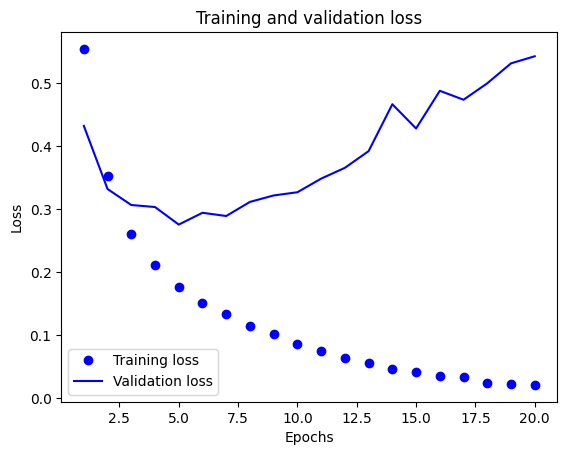

In [34]:
import matplotlib.pyplot as plt

history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the accutacy

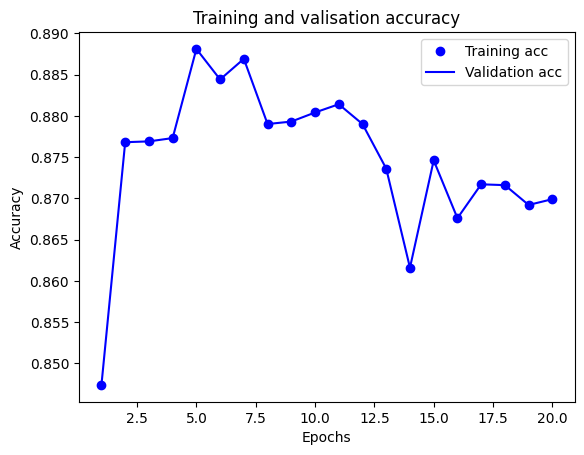

In [35]:
val_acc = history_dic['val_acc']

plt.plot(epochs, val_acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label= "Validation acc")
plt.title('Training and valisation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()